In [10]:
import matplotlib.pyplot as plt

import os
os.chdir("/home/guest_dyw/diffusion-sampler/")

from energy import (
    GaussianEnergy, 
    UniformEnergy, 
    AnnealedDensities, 
    AnnealedEnergy, 
    GMM9,
    GMM25, 
    Funnel,
    ManyWell,
    Plotter, 
    BaseEnergy
)

In [2]:
gaussian_prior = GaussianEnergy(device='cpu', dim=2, logvar=3.0)
gaussian_prior.log_prob = gaussian_prior.energy

uniform_prior = UniformEnergy(device='cpu', dim=2, max_support=20)
uniform_prior.log_prob = uniform_prior.energy

gmm = GMM25(device='cpu', dim=2)

annealed_densities = AnnealedDensities(gmm, gaussian_prior)

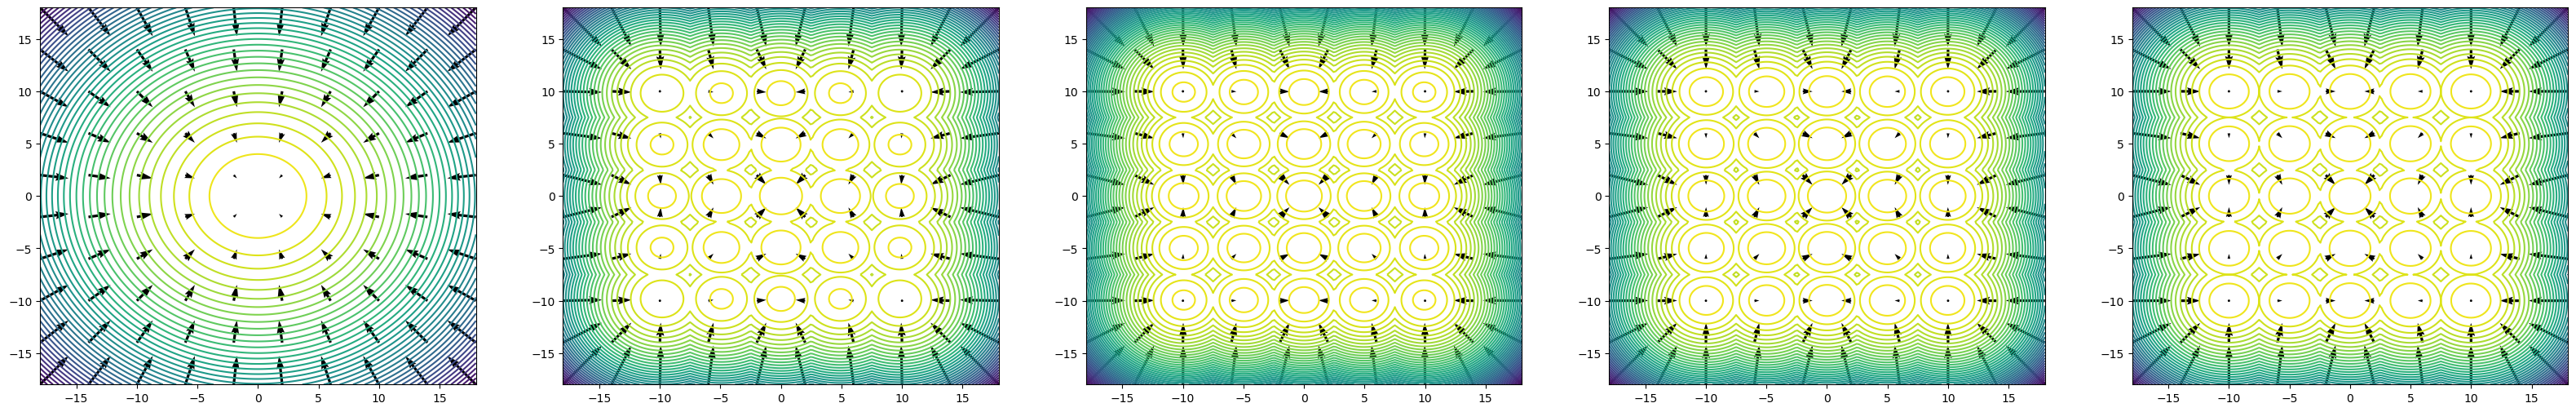

In [3]:
fig, axs = plt.subplots(1, 5, figsize=(40, 6))

dt = 1.0 / len(axs)

for i, ax in enumerate(axs.flatten()):
    interpolated_energy = AnnealedEnergy(annealed_densities, time=i * dt)

    def log_prob(x):
        return -interpolated_energy.energy(x)

    interpolated_energy.log_prob = log_prob

    plotter = Plotter(interpolated_energy, plotting_bounds=(-18, 18))
    plotter.draw_contour(ax)
    plotter.draw_vector_field(ax, interpolated_energy.score, 'cpu')